In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# import os
# os.chdir('drive/My Drive/Colab Notebooks/dataset')

In [9]:
import pandas as pd
df=pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [10]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [11]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# AREA

In [12]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [13]:
df["AREA"]=df["AREA"].replace("TNagar","T Nagar")
df["AREA"]=df["AREA"].replace("Chrompt","Chrompet")
df["AREA"]=df["AREA"].replace("Chrmpet","Chrompet")
df["AREA"]=df["AREA"].replace("Chormpet","Chrompet")
df["AREA"]=df["AREA"].replace("Karapakam","Karapakkam")
df["AREA"]=df["AREA"].replace("Ana Nagar","Anna Nagar")
df["AREA"]=df["AREA"].replace("Ann Nagar","Anna Nagar")
df["AREA"]=df["AREA"].replace("Adyr","Adyar")
df["AREA"]=df["AREA"].replace("Velchery","Velachery")
df["AREA"]=df["AREA"].replace("KKNagar","KK Nagar")

In [14]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

There are seven unique values in area column

# INT_SQFT

In [15]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

# DATE_SALE

In [16]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])

# DIST_MAINROAD

In [17]:
df.DIST_MAINROAD.isnull().sum()

0

In [18]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

# N_BEDROOM

In [19]:
df.N_BEDROOM.isnull().sum()

1

In [20]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

In [21]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

In [22]:
df.N_BEDROOM.unique()

array([1., 2., 3., 4.])

# N_BATHROOM

In [23]:
df.N_BATHROOM.isnull().sum()

5

In [24]:
df.N_BATHROOM.unique()

array([ 1.,  2., nan])

In [25]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

In [26]:
df.N_BATHROOM.unique()

array([1., 2.])

# N_ROOM

In [27]:
df.N_ROOM.unique()

array([3, 5, 4, 2, 6])

# SALE_COND

In [28]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [29]:
df["SALE_COND"]=df["SALE_COND"].replace("Ab Normal","AbNormal")
df["SALE_COND"]=df["SALE_COND"].replace("Partiall","Partial")
df["SALE_COND"]=df["SALE_COND"].replace("Adj Land","AdjLand")
df["SALE_COND"]=df["SALE_COND"].replace("PartiaLl","Partial")

In [30]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

# PARK_FACIL

In [31]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [32]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace("Noo","No")

In [33]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

# DATE_BUILD

In [34]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

# BUILDTYPE

In [35]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [36]:
df["BUILDTYPE"]=df["BUILDTYPE"].replace("Other","Others")
df["BUILDTYPE"]=df["BUILDTYPE"].replace("Comercial","Commercial")

In [37]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

# UTILITY_AVAIL

In [38]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [39]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace("NoSewr ","NoSewr")
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace("All Pub","AllPub")

In [40]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

# STREET

In [41]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [42]:
df["STREET"]=df["STREET"].replace("Pavd","Paved")
df["STREET"]=df["STREET"].replace("NoAccess","No Access")

In [43]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

# MZZONE

In [44]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

There is no spelling mistake

# SALES_PRICE

In [45]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

# QS_ROOMS,QS_BATHROOM,QS_BEDROOM and QS_OVERALL

In [46]:
df.QS_ROOMS.isnull().sum()

0

In [47]:
df.QS_BATHROOM.isnull().sum()

0

In [48]:
df.QS_BEDROOM.isnull().sum()

0

In [49]:
df.QS_OVERALL.isnull().sum()

48

In [50]:
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

# Drop the not required columns

In [51]:
df.drop("PRT_ID",axis=1,inplace=True)
df.drop("REG_FEE",axis=1,inplace=True)

df.drop("COMMIS",axis=1,inplace=True)

In [52]:
df.shape

(7109, 19)

# Date sale and Date build

In [53]:
df1=df.DATE_SALE.dt.year
df2=df.DATE_BUILD.dt.year

In [54]:
df['HOUSE_AGE']=(df1-df2)

# EDA

## AREA vs SALES PRICE

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


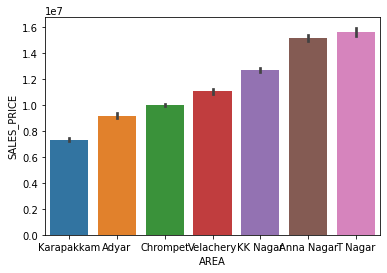

In [56]:
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

1.There is linear relation between AREA and SALES PRICE                         
2.As AREA changes sales price changes                  
3.There is linear relation hence Encoding Label Encoding


# INT_SQFT vs SALES PRICE

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


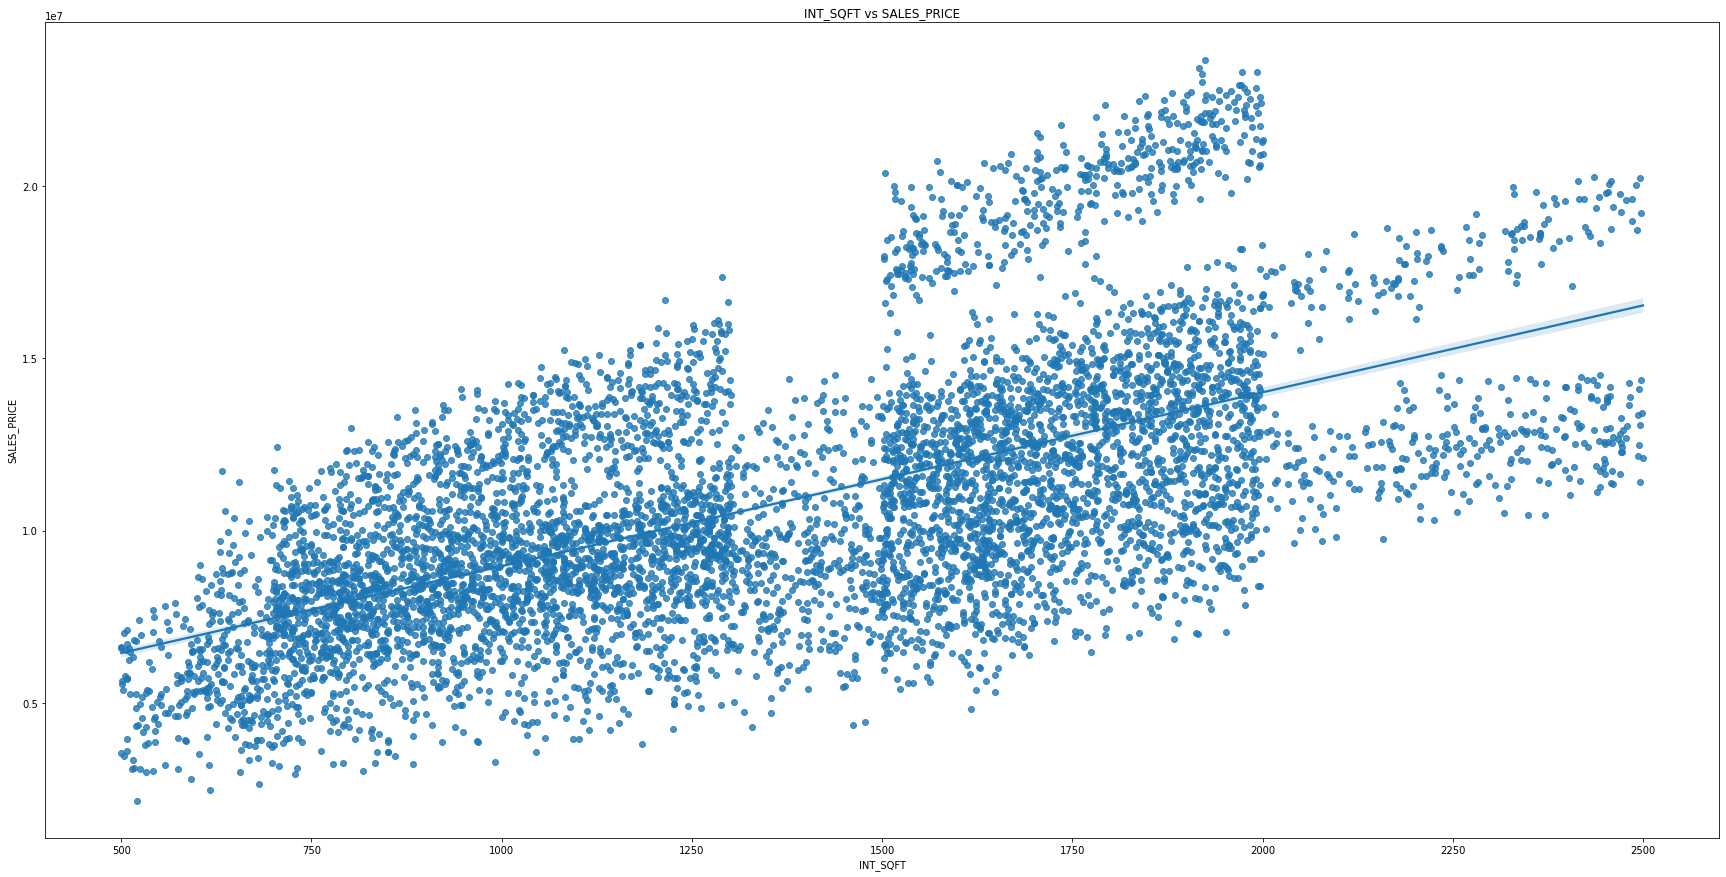

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.regplot(x=df.INT_SQFT,y=df.SALES_PRICE)
plt.title('INT_SQFT vs SALES_PRICE')

#Correlation
df[['INT_SQFT','SALES_PRICE']].corr()

1.Plot shows there is linear relation                                       
2.Correlation is 0.61 is good correlation

# DIST_MAINROAD vs SALES PRICE

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


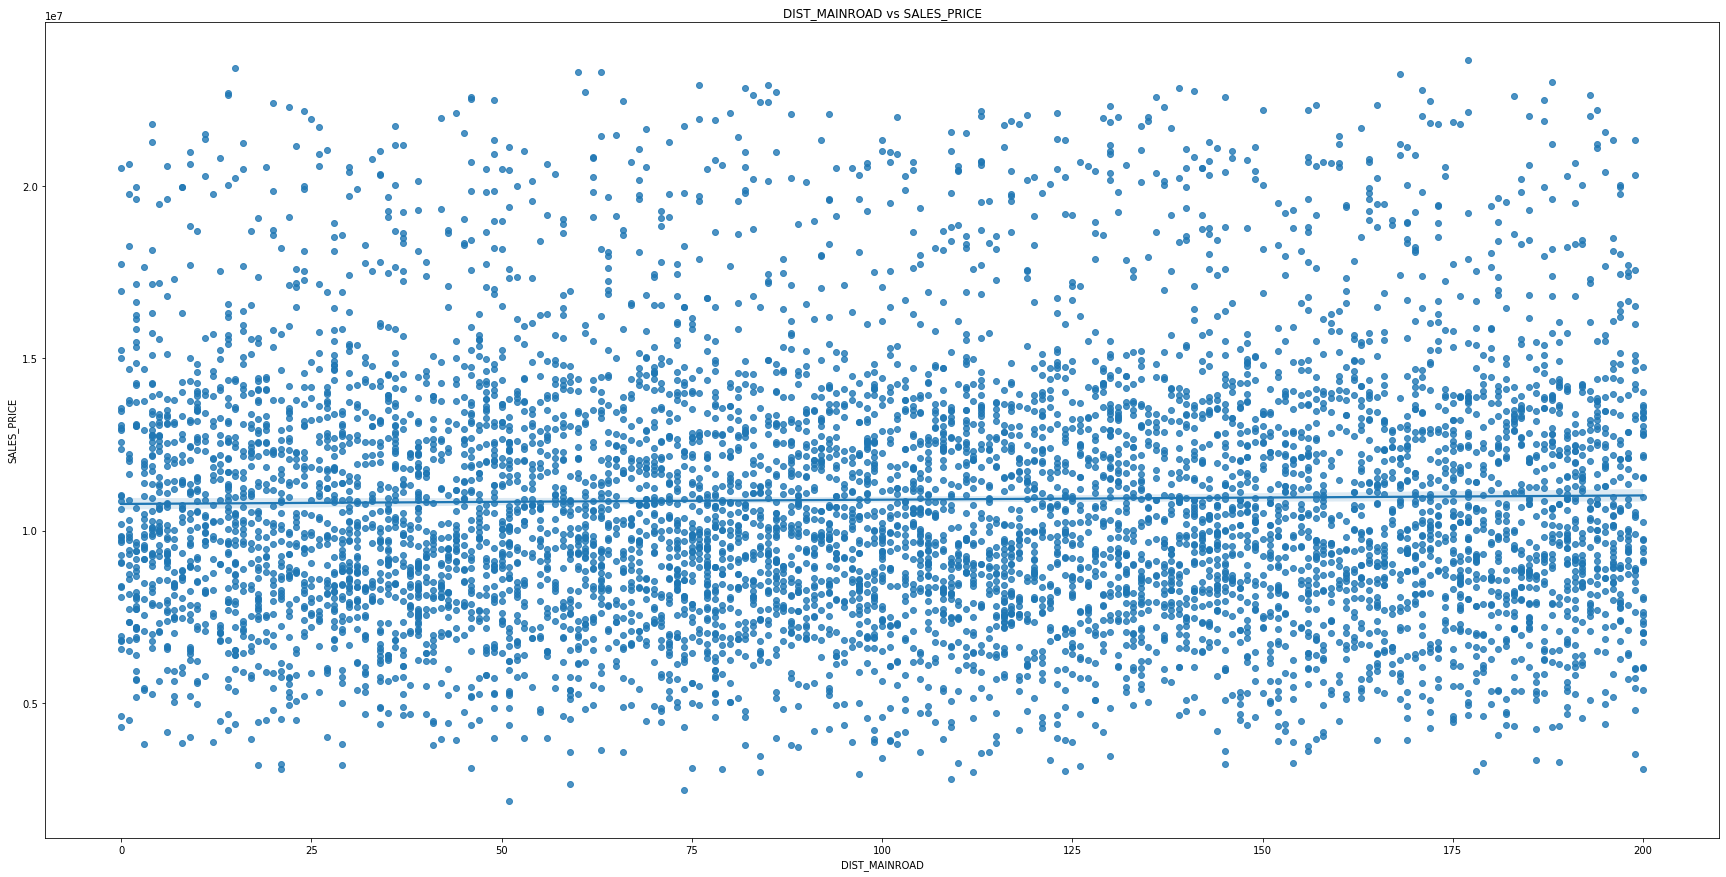

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.regplot(x=df.DIST_MAINROAD,y=df.SALES_PRICE)
plt.title('DIST_MAINROAD vs SALES_PRICE')

#Correlation
df[['DIST_MAINROAD','SALES_PRICE']].corr()

1.There is no linear relation

2.drop the DIST_MAINROAD

# N_BEDROOM vs SALES PRICE

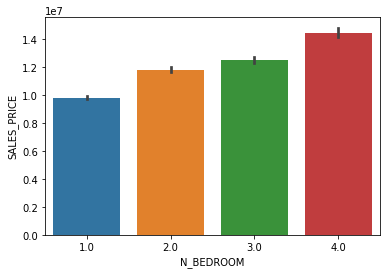

In [59]:
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])

1.There is linear relation                                                    
2.As room increases sales price also increases                                 
3.Encoding not required already did

# N_BATHROOM vs SALES PRICE

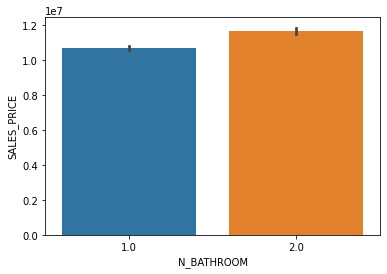

In [60]:
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])

1.There is linear relation                                                     
2.as Bathrooms are increasing sales price is incereasing

N_ROOM vs SALES PRICE

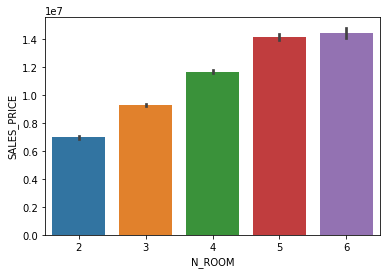

In [61]:
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])

1.There is  linear relation upto 5 rooms but 5 and 6 there is less linear relation (we consider linear relation and proceed)

2.as rooms increasing  sales price also increasing

3.Encoding not required 


SALE_COND vs SALES PRICE

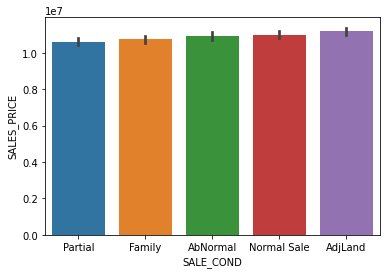

In [62]:
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

1.There is linear relation                                           
2.there is slight change sales price                                      
3.Encoding is label encoding

# PARK FACIL vs SALES PRICE

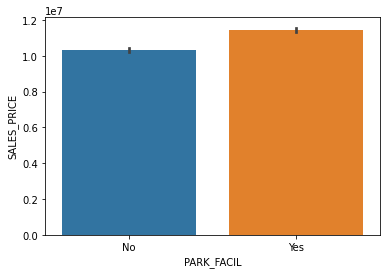

In [63]:
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

1.There is linear relation 

2.Encoding label encoding

# BUILDTYPE  vs SALES PRICE

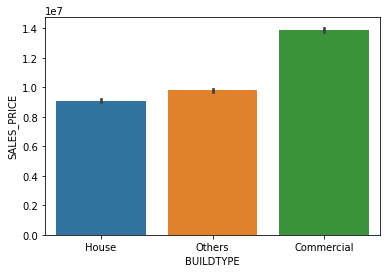

In [64]:
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

1.there is no  linear realtionship                                       
2.Encoding do onehot encoding


# UTILITY_AVAIL vs SALES PRICE

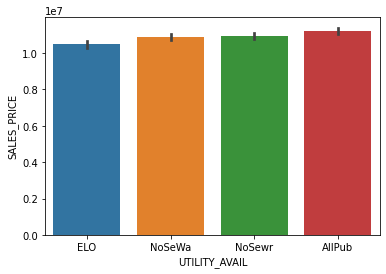

In [65]:
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

1.There  is no linear relation

2.we do the one hot encoding

# STREET vs SALES PRICE

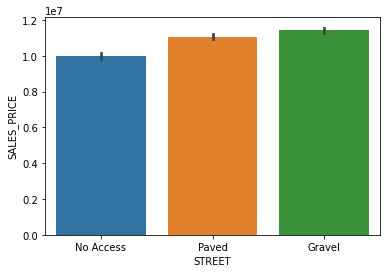

In [66]:
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

1.There is linear relation 

2.as street changes sales price also changes

3.Encoding require is Label Encoding

# MZZONE vs SALES PRICE

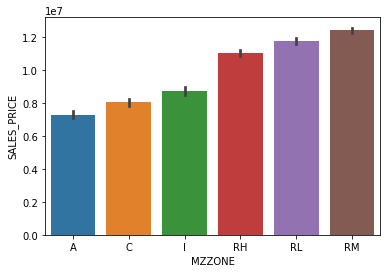

In [67]:
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

1.There is low linear relation

2.First 3 are good linear relation then last three are good relation

3.Encoding is label encoding

# QS_ROOMS vs SALES PRICE

In [68]:
df.QS_ROOMS.unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


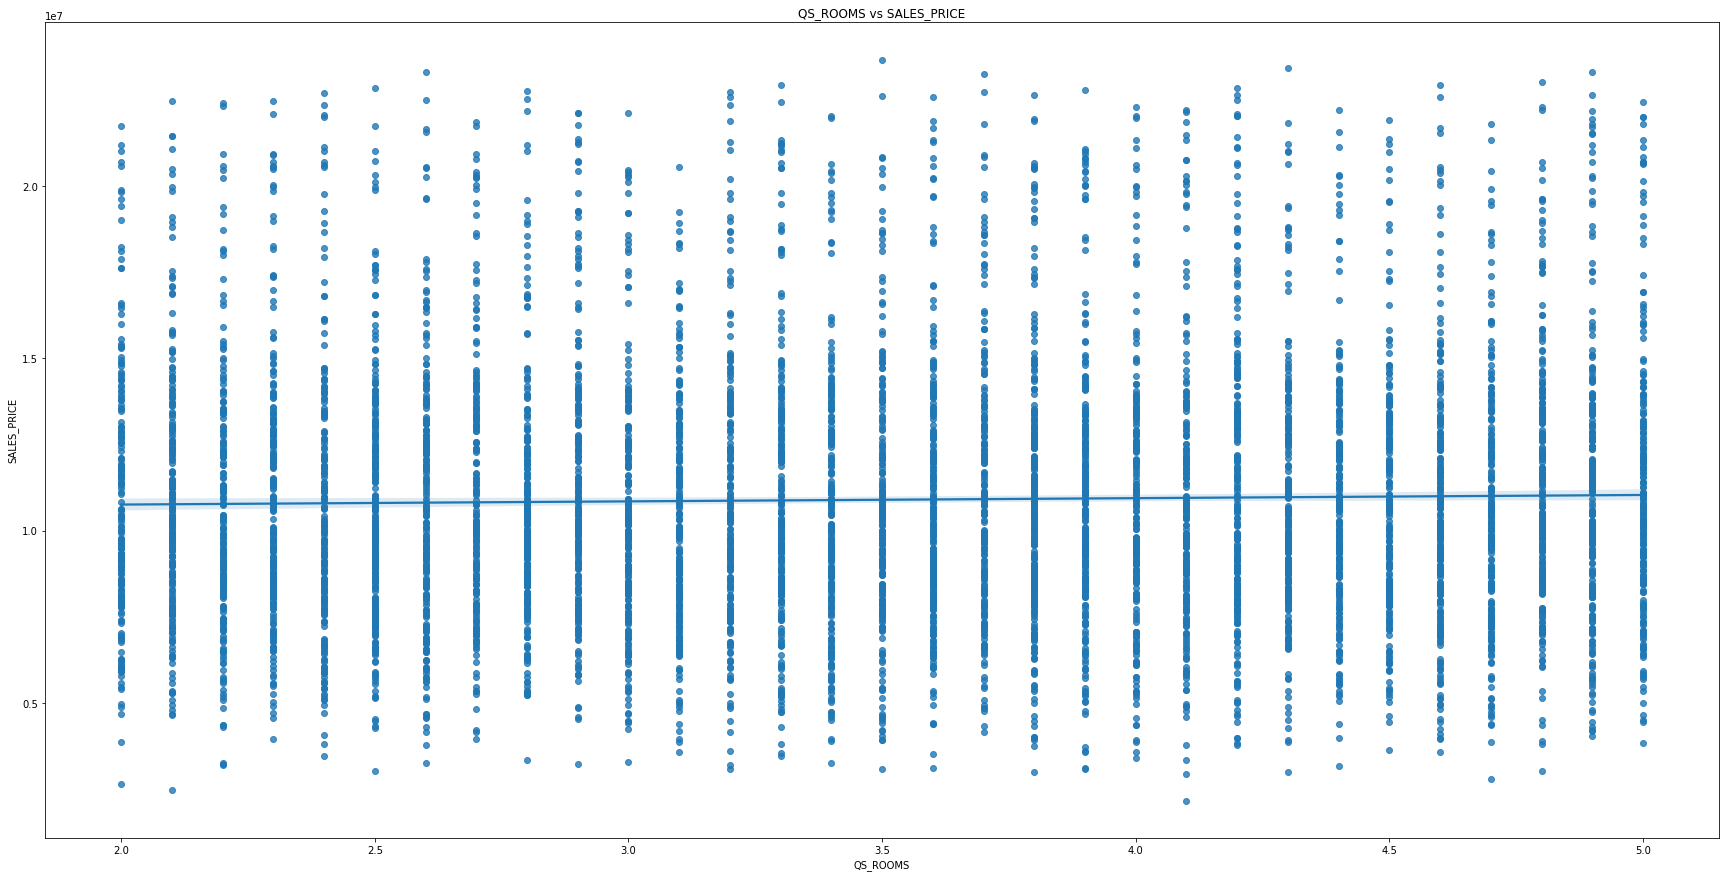

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.regplot(x=df.QS_ROOMS,y=df.SALES_PRICE)
plt.title('QS_ROOMS vs SALES_PRICE')

#Correlation
df[['QS_ROOMS','SALES_PRICE']].corr()

1.There is no linear relation

2.correlation  very low

3.drop the QS_ROOMS

# QS_BATHROOM vs SALES PRICE

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


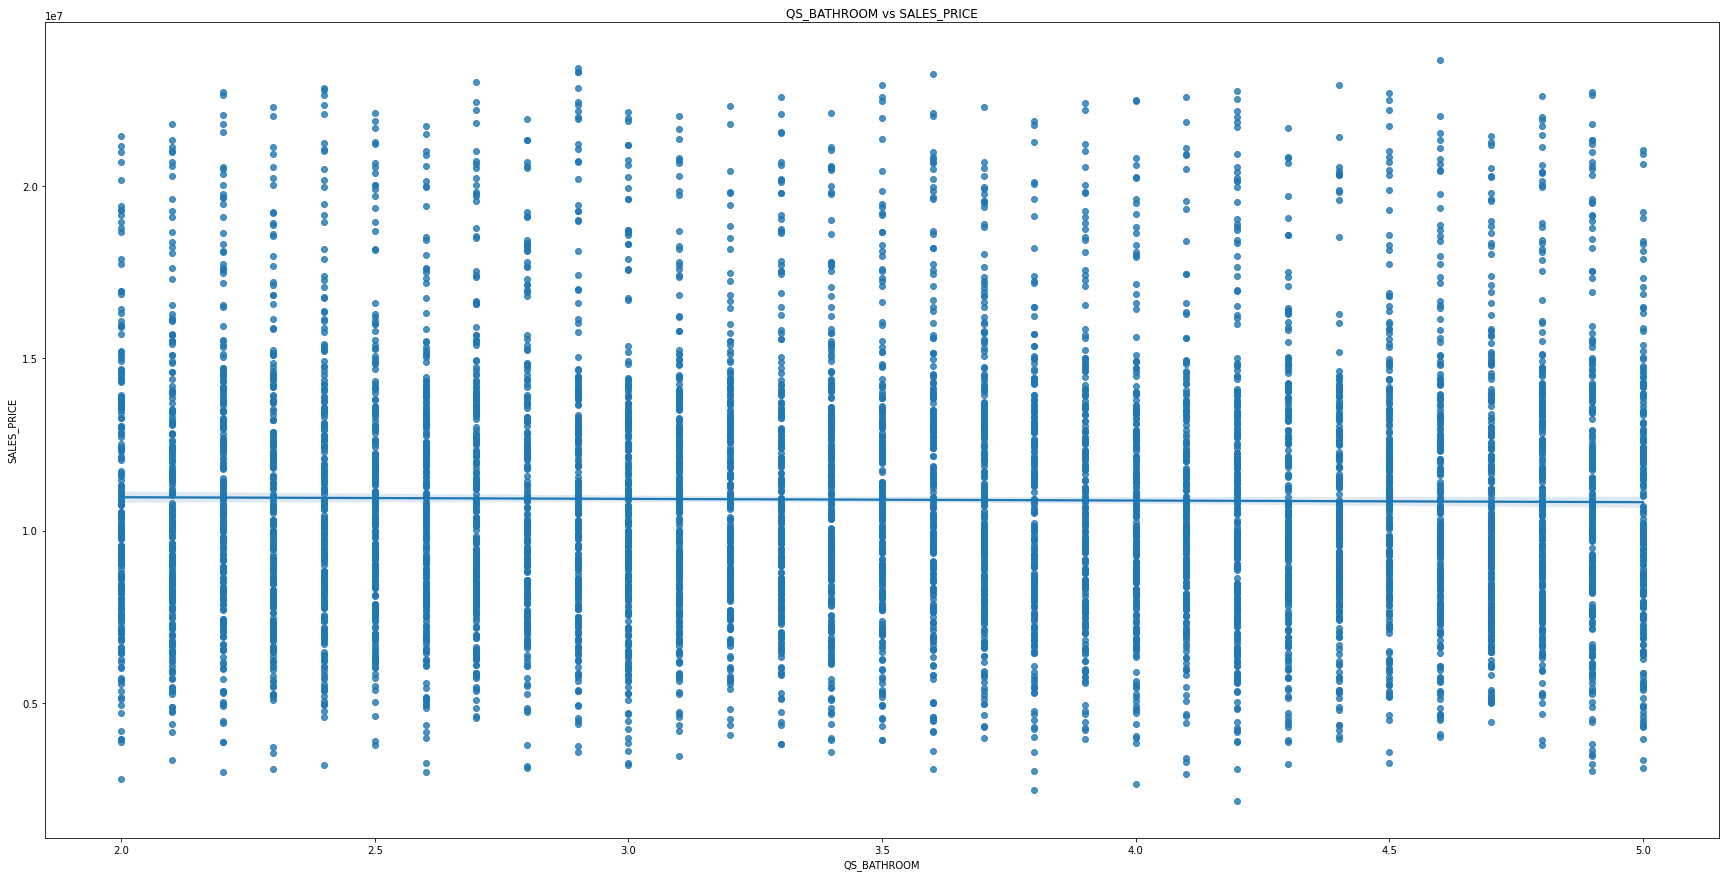

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.regplot(x=df.QS_BATHROOM,y=df.SALES_PRICE)
plt.title('QS_BATHROOM vs SALES_PRICE')

#Correlation
df[['QS_BATHROOM','SALES_PRICE']].corr()

1.There is no linear relation

2.correlation  very low

3.drop the QS_BATHROOM

# QS_BEDROOM vs SALES PRICE

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


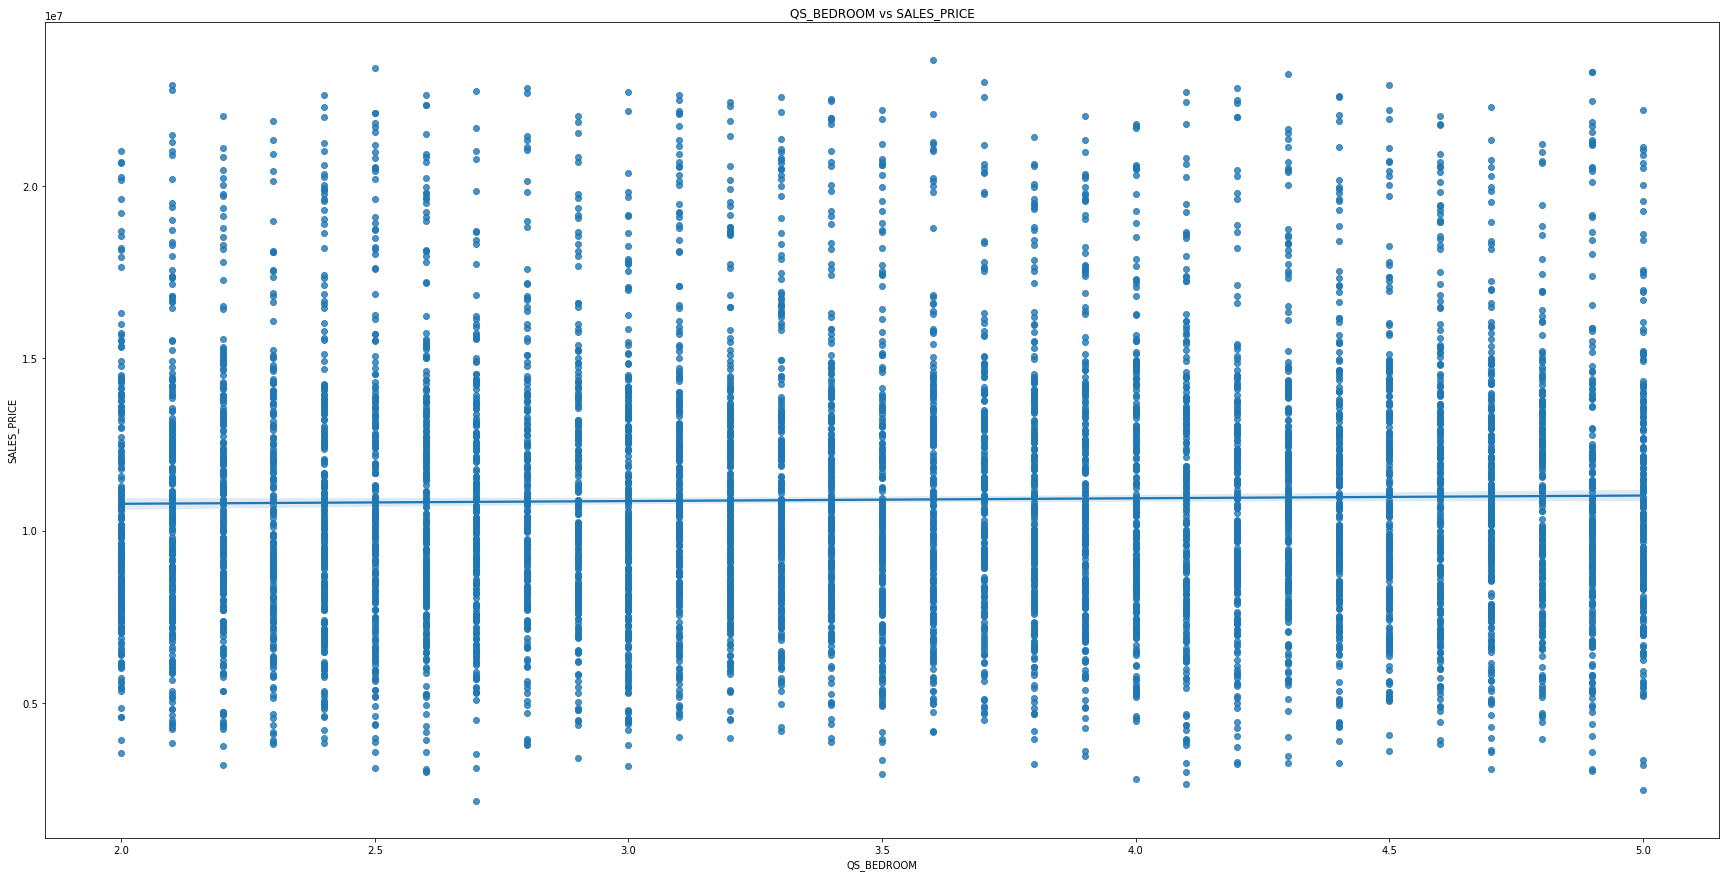

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.regplot(x=df.QS_BEDROOM,y=df.SALES_PRICE)
plt.title('QS_BEDROOM vs SALES_PRICE')

#Correlation
df[['QS_BEDROOM','SALES_PRICE']].corr()

1.There is no linear relation

2.correlation  very low

3.drop the QS_BEDROOM

# QS_OVERALL vs SALES PRICE

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020485
SALES_PRICE,0.020485,1.000000


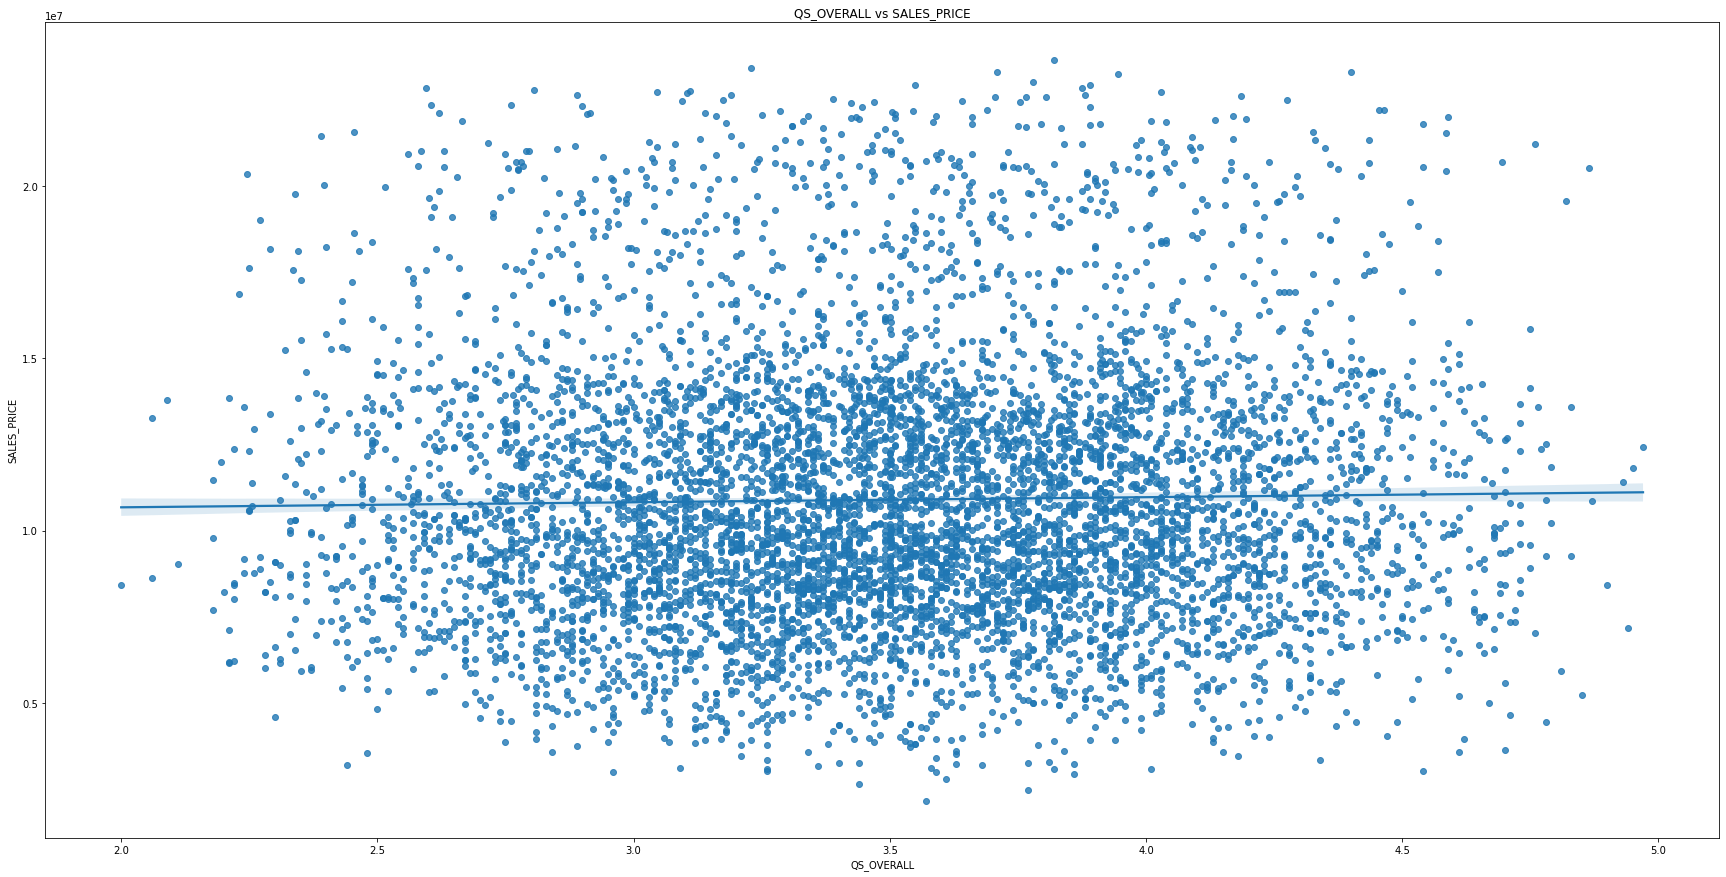

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.regplot(x=df.QS_OVERALL,y=df.SALES_PRICE)
plt.title('QS_OVERALL vs SALES_PRICE')

#Correlation
df[['QS_OVERALL','SALES_PRICE']].corr()

1.There is no linear relation

2.correlation also low

3.drop the QS_OVERALL

## HOUSE AGE vs SALES PRICE

,HOUSE_AGE,SALES_PRICE
HOUSE_AGE,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


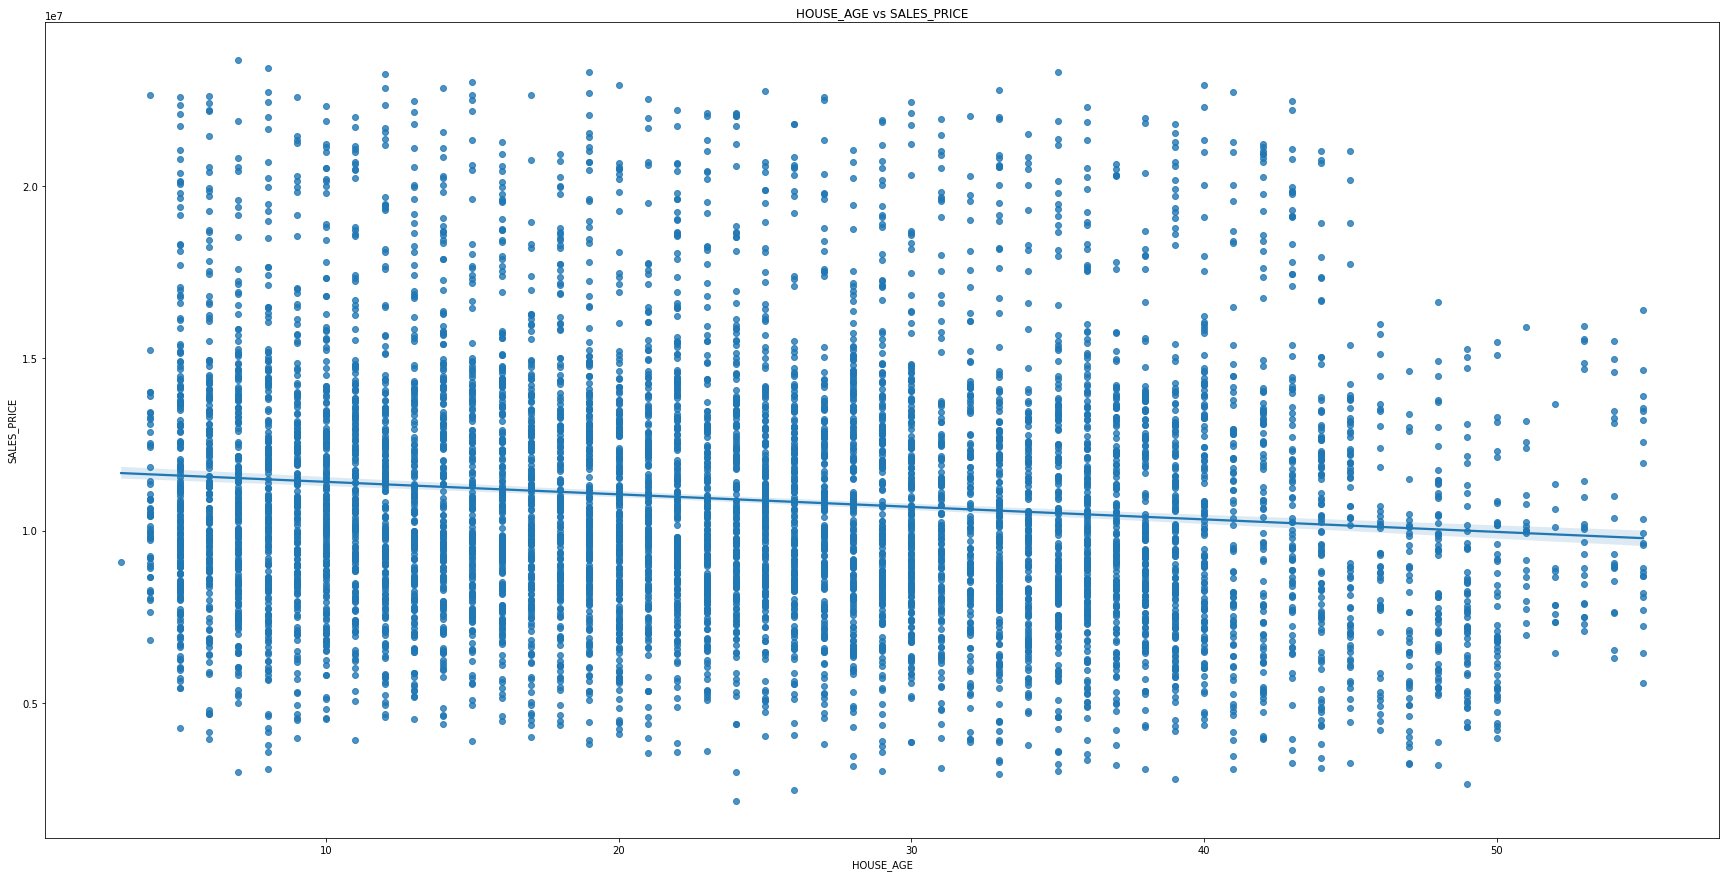

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
sns.regplot(x=df.HOUSE_AGE,y=df.SALES_PRICE)
plt.title('HOUSE_AGE vs SALES_PRICE')

#Correlation
df[['HOUSE_AGE','SALES_PRICE']].corr()


In [74]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

# Droping columns

In [75]:
df.drop("DIST_MAINROAD",axis=1,inplace=True)
#df.drop("QS_ROOMS",axis=1,inplace=True)
df.drop("QS_BATHROOM",axis=1,inplace=True)
df.drop("QS_BEDROOM",axis=1,inplace=True)
df.drop("QS_OVERALL",axis=1,inplace=True)

# Encoding

# AREA

In [76]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [77]:
df.AREA = df.AREA.map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

In [78]:
df.AREA.unique()

array([1, 6, 2, 4, 3, 5, 7])

In [79]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

# SALE_COND

In [80]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [81]:
df.SALE_COND = df.SALE_COND.map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5})

In [82]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

# PARK_FACIL

In [83]:
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1,'No':0})

In [84]:
df.PARK_FACIL.unique()

array([1, 0])

# BUILDTYPE

In [85]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [86]:
df.BUILDTYPE = df.BUILDTYPE.map({'House':1,'Others':2,'Commercial':4})

In [87]:
df.BUILDTYPE.unique()


array([4, 2, 1])

# UTILITY_AVAIL

In [88]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [89]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})

# STREET

In [90]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [91]:
df.STREET = df.STREET.map({'No Access':1,'Paved':2,'Gravel':3})

# MZZONE

In [92]:
df.MZZONE = df.MZZONE.map({'A':1,'C':2,'I':3,'RH':5,'RL':6,'RM':7})

In [93]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

In [95]:
df.dtypes

AREA                      int64
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                 int64
PARK_FACIL                int64
DATE_BUILD       datetime64[ns]
BUILDTYPE                 int64
UTILITY_AVAIL             int64
STREET                    int64
MZZONE                    int64
QS_ROOMS                float64
SALES_PRICE               int64
HOUSE_AGE                 int64
dtype: object

# SPLIT

In [96]:
X = df.drop(['SALES_PRICE','DATE_SALE','DATE_BUILD','QS_ROOMS'
       ], axis=1) # select all rows and select all columns except the last column as my feature
y = df["SALES_PRICE"].values # target as arrays

# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [104]:
X

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE
0,1,1004,1.0,1.0,3,3,1,4,4,2,1,44
1,6,1986,2.0,1.0,5,3,0,4,4,3,5,11
2,2,909,1.0,1.0,3,3,1,4,1,3,6,20
3,4,1855,3.0,2.0,5,2,0,2,3,2,3,22
4,1,1226,1.0,1.0,3,3,1,2,4,3,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1.0,1.0,2,5,0,2,1,1,7,49
7105,4,1897,3.0,2.0,5,2,1,2,2,1,5,9
7106,4,1614,2.0,1.0,4,4,0,1,2,3,3,28
7107,1,787,1.0,1.0,2,1,1,4,1,2,6,32


# SCALE

In [97]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

# MODEL

LINEAR REGRESSION

In [98]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([13983050.28441323, 14063073.89995845, 18381251.97984972, ...,
       13478815.3527632 , 15728651.00921218,  7750345.79152796])

In [100]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9102199270593331


In [105]:
X

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE
0,1,1004,1.0,1.0,3,3,1,4,4,2,1,44
1,6,1986,2.0,1.0,5,3,0,4,4,3,5,11
2,2,909,1.0,1.0,3,3,1,4,1,3,6,20
3,4,1855,3.0,2.0,5,2,0,2,3,2,3,22
4,1,1226,1.0,1.0,3,3,1,2,4,3,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1.0,1.0,2,5,0,2,1,1,7,49
7105,4,1897,3.0,2.0,5,2,1,2,2,1,5,9
7106,4,1614,2.0,1.0,4,4,0,1,2,3,3,28
7107,1,787,1.0,1.0,2,1,1,4,1,2,6,32


Feature Importance

Feature: 0, Score: 1046940.70296
Feature: 1, Score: 661572.11628
Feature: 2, Score: -1281083.57718
Feature: 3, Score: 124110.88648
Feature: 4, Score: 1767674.59601
Feature: 5, Score: 223906.86397
Feature: 6, Score: 520701.34630
Feature: 7, Score: 2017258.82768
Feature: 8, Score: 57018.60817
Feature: 9, Score: 403709.47585
Feature: 10, Score: 874160.08018
Feature: 11, Score: -208928.79119


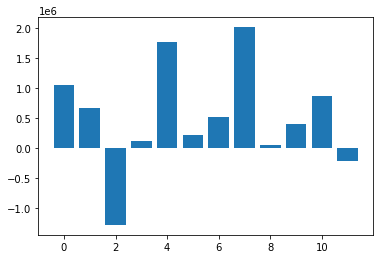

In [102]:
# get importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

1.Most important Features are Following
2.Buildtype,N Room,Area,Mzzone,Int sqft,Park Facil are the important features


Cross validation

XGB

In [111]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test, y_test)

[14:57:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9924737477551193

Feature: 0, Score: 0.22486
Feature: 1, Score: 0.07504
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00075
Feature: 4, Score: 0.36714
Feature: 5, Score: 0.00451
Feature: 6, Score: 0.02366
Feature: 7, Score: 0.23545
Feature: 8, Score: 0.00162
Feature: 9, Score: 0.01299
Feature: 10, Score: 0.05080
Feature: 11, Score: 0.00317


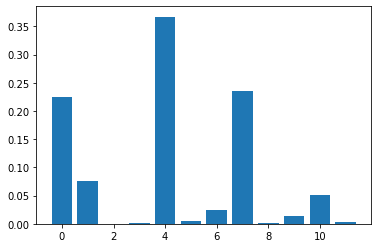

In [112]:
# get importance
importance = xgb_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

1.Most Important Features are Following

2.N_Room,Buildtype,Area,Int Sqft,Mzzone,Park Facil are Important

Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.9750275797800474

Feature: 0, Score: 0.48662
Feature: 1, Score: 0.11412
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.00090
Feature: 4, Score: 0.00014
Feature: 5, Score: 0.00259
Feature: 6, Score: 0.01532
Feature: 7, Score: 0.32354
Feature: 8, Score: 0.00138
Feature: 9, Score: 0.01142
Feature: 10, Score: 0.03884
Feature: 11, Score: 0.00508


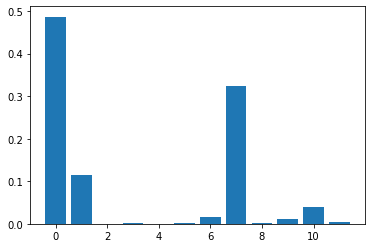

In [107]:
# get importance
importance = dt_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

1.Most Important features are Following

2.Area,Buildtype,Int Sqft,Mzzone,Park Facil are most important Features

KNN

In [113]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance


# define the model
knn= KNeighborsRegressor()
# fit the model

knn.fit(X_train, y_train)
knn.score(X_test, y_test)



0.9516631799764259

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, bu

Feature: 0, Score: 0.00000
Feature: 1, Score: -387032279391.24530
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -46259189359.92500
Feature: 6, Score: 8887637016.27813
Feature: 7, Score: 490509781191.95001
Feature: 8, Score: -56718460113.75000
Feature: 9, Score: -102291390780.42500
Feature: 10, Score: 12904325244.98281
Feature: 11, Score: -175165102836.72186


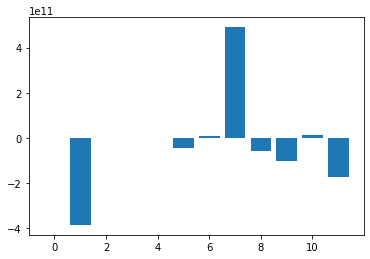

In [114]:
# perform permutation importance
results = permutation_importance(knn, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.9902510443457118

Feature: 0, Score: 0.48524
Feature: 1, Score: 0.11127
Feature: 2, Score: 0.00087
Feature: 3, Score: 0.00162
Feature: 4, Score: 0.00438
Feature: 5, Score: 0.00278
Feature: 6, Score: 0.01461
Feature: 7, Score: 0.32324
Feature: 8, Score: 0.00157
Feature: 9, Score: 0.01070
Feature: 10, Score: 0.03824
Feature: 11, Score: 0.00546


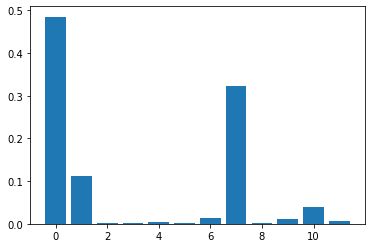

In [110]:
# get importance
importance = rf_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

1.MOst Important Features are following

2.Area,Buildtype,Int Sqft,Mzzone are imporatant